# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1:].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

ss_x = StandardScaler()
X = ss_x.fit_transform(X)

ss_y = StandardScaler()
y = ss_y.fit_transform(y)

In [7]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the SVR model on whole dataset

In [9]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

# Predicting new result

In [10]:
ss_y.inverse_transform(regressor.predict(ss_x.transform([[6.5]])))

array([170370.0204065])

# Visualizing SVR result

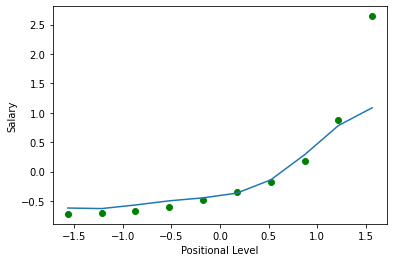

In [11]:
plt.scatter(X,y,color='green')
plt.plot(X,regressor.predict(X))
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.show()

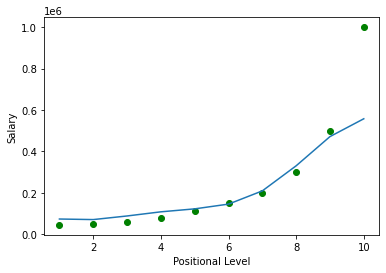

In [17]:
plt.scatter(ss_x.inverse_transform(X),ss_y.inverse_transform(y),color='green')
plt.plot(ss_x.inverse_transform(X),ss_y.inverse_transform(regressor.predict(X)))
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

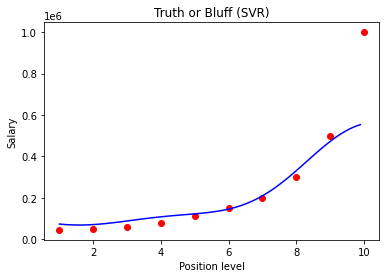

In [22]:
X_grid = np.arange(min(ss_x.inverse_transform(X)), max(ss_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(ss_x.inverse_transform(X), ss_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, ss_y.inverse_transform(regressor.predict(ss_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()